In [1]:
import pandas as pd
import numpy as np
import json

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

from sklearn import linear_model
from sklearn.model_selection import cross_val_score

## Log Transformation

So We're going to be looking at log transformations for our Online News Dataset

In [2]:
# Download the Online News Popularity dataset from the classroom, then use
# pandas to load the file into a DataFrame

df = pd.read_csv('OnlineNewsPopularity.csv', delimiter=', ')


C:\Users\drebi\AppData\Local\Temp\ipykernel_72736\3964330579.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('OnlineNewsPopularity.csv', delimiter=', ')


In [3]:
#Take the log transformation of 'n_token_content' feature.
# This represents the number of words (tokens) in a news article

df['log_n_tokens_content'] = np.log10(df['n_tokens_content'] + 1)

In [4]:
df

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,log_n_tokens_content
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,2.342423
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,2.408240
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,2.326336
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,2.725912
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,3.030600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,...,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800,2.540329
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,...,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900,2.517196
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,...,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900,2.646404
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,...,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100,2.834421


In [5]:
# Now we want to train two linear regression models to predict the number of shares
# of an article, one using the original feature and the other using the log
# transformation version.

news_orig_model = linear_model.LinearRegression()
scores_orig = cross_val_score(news_orig_model, df[['n_tokens_content']], df['shares'], cv=10)

news_log_model = linear_model.LinearRegression()
scores_log = cross_val_score(news_log_model, df[['log_n_tokens_content']], df['shares'], cv=10)

print("R-squared score without log transform: %0.5f (+/- %0.5f)" % (scores_orig.mean(), scores_orig.std() * 2))

print("R-squared score with log transform: %0.5f (+/- %0.5f)" % (scores_log.mean(), scores_log.std() * 2))

R-squared score without log transform: -0.00242 (+/- 0.00509)
R-squared score with log transform: -0.00114 (+/- 0.00418)


So there is some overlap, but the model with the log transformed feature is doing better than the one without. Why is the log transformed so much more successful on this dataset. We can look at this by looking at the scatterplots of this dataset.

Text(0, 0.5, 'Number of Articles')

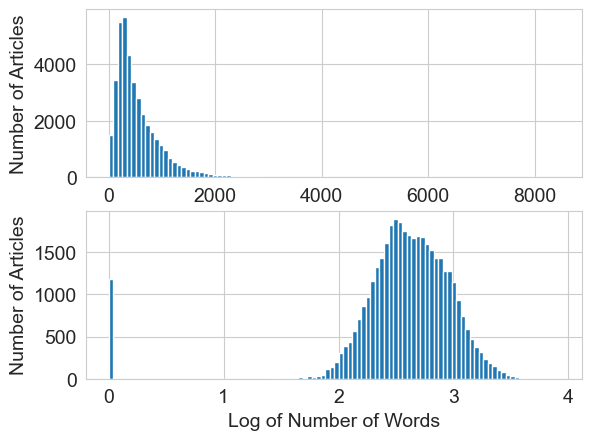

In [6]:
plt.figure()
ax = plt.subplot(2,1,1)
df['n_tokens_content'].hist(ax=ax, bins=100)
ax.tick_params(labelsize=14)
ax.set_xlabel('Number of Words in Article', fontsize=14)
ax.set_ylabel('Number of Articles', fontsize=14)

ax = plt.subplot(2,1,2)
df['log_n_tokens_content'].hist(ax=ax, bins=100)
ax.tick_params(labelsize=14)
ax.set_xlabel('Log of Number of Words', fontsize=14)
ax.set_ylabel('Number of Articles', fontsize=14)

The log transformation reshaped the x-axis, pulling the articles with large outliers in towards the average, to the righthand side of the axis. This gives the linear model more "breathing room" on the low end of the input feature space.

Without the log transform, which is the top panel, the model is under more pressure to fit very different target values under very small changes in the input value.

Text(0, 0.5, 'Number of Shares')

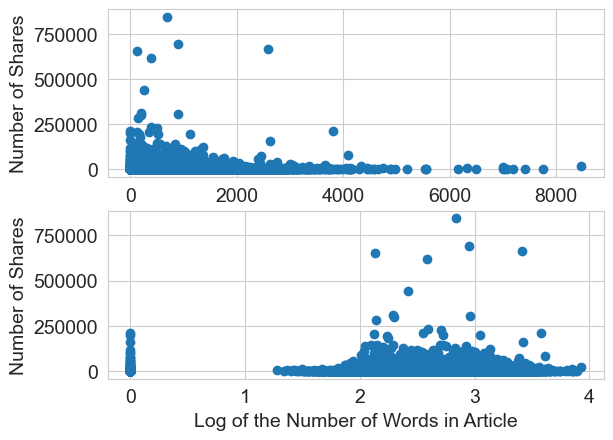

In [6]:
fig2, (ax1, ax2) = plt.subplots(2,1)
ax1.scatter(df['n_tokens_content'], df['shares'])
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Number of Words in Article', fontsize=14)
ax1.set_ylabel('Number of Shares', fontsize=14)

ax2.scatter(df['log_n_tokens_content'], df['shares'])
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Log of the Number of Words in Article', fontsize=14)
ax2.set_ylabel('Number of Shares', fontsize=14)


## Feature Scaling

### Min-Max Scaling

Min-max scaling squeezes (or stretches) all features values to be within the range [0,1].

$$\bar{x}=\frac{x-\min(x)}{\max(x)-\min(x)}

In [10]:
import pandas as pd
import sklearn.preprocessing as preproc

df['n_tokens_content'].values
df['minmax'] = preproc.minmax_scale(df[['n_tokens_content']])
df['minmax'].values

df['standardized'] = preproc.StandardScaler().fit_transform(df[['n_tokens_content']])
df['standardized'].values

array([0.02584376, 0.03009205, 0.02489969, ..., 0.05215955, 0.08048147,
       0.01852726])

We can also visualize the distribution of data with different feature scaling methods. Unlike log transform, feature scaling doesn't change the shape of the distribution. It only scales the data changes.

Text(45.347222222222214, 0.5, 'Number of articles')

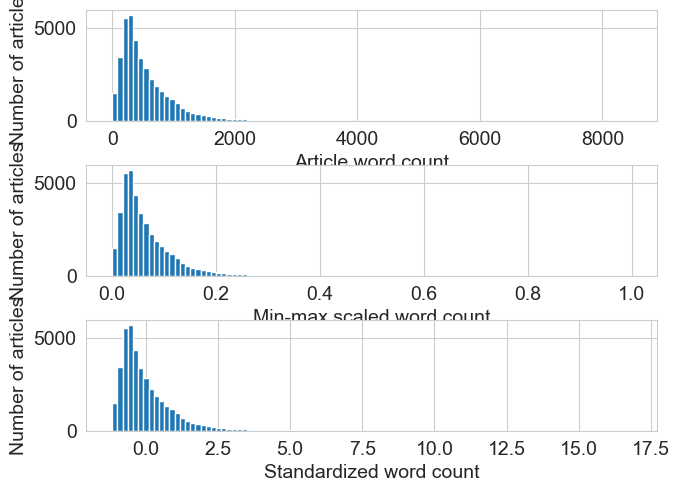

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1)
fig.tight_layout()
df['n_tokens_content'].hist(ax=ax1, bins=100)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Article word count', fontsize=14)
ax1.set_ylabel('Number of articles', fontsize=14)

df['minmax'].hist(ax=ax2, bins=100)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Min-max scaled word count', fontsize=14)
ax2.set_ylabel('Number of articles', fontsize=14)

df['standardized'].hist(ax=ax3, bins=100)
ax3.tick_params(labelsize=14)
ax3.set_xlabel('Standardized word count', fontsize=14)
ax3.set_ylabel('Number of articles', fontsize=14)

## Dummy Coding

In [18]:
import pandas
from sklearn import linear_model

# Define a toy dataset of apartment rental prices in
# New York, San Francisco, and Seattle
df = pd.DataFrame({
    'City': ['SF','SF','SF', 'NYC', 'NYC', 'NYC', 'Seattle', 'Seattle', 'Seattle'],
    'Rent': [3999, 4000, 4001, 3499, 3500, 3501, 2499, 2500, 2501]
})

df['Rent'].mean()

3333.3333333333335

In [20]:
# Convert the categorical variables in the DataFrame to one-hot encoding
# and fit a linear regression model
one_hot_df = pd.get_dummies(df, prefix=['city'], dtype=int)
one_hot_df

,Rent,city_NYC,city_SF,city_Seattle
0,3999,0,1,0
1,4000,0,1,0
2,4001,0,1,0
3,3499,1,0,0
4,3500,1,0,0
5,3501,1,0,0
6,2499,0,0,1
7,2500,0,0,1
8,2501,0,0,1


In [21]:
lin_reg = linear_model.LinearRegression()
lin_reg.fit(one_hot_df[['city_NYC', 'city_SF', 'city_Seattle']], one_hot_df['Rent'])

LinearRegression()

In [22]:
lin_reg.coef_

array([ 166.66666667,  666.66666667, -833.33333333])

In [23]:
lin_reg.intercept_

3333.3333333333335

In [25]:
# Train a lienar regression model on dummy code,
# then specify the 'drop_first' parameter to get the dummy encoding

dummy_df = pd.get_dummies(df, prefix=['city'], drop_first=True, dtype=int)
dummy_df

,Rent,city_SF,city_Seattle
0,3999,1,0
1,4000,1,0
2,4001,1,0
3,3499,0,0
4,3500,0,0
5,3501,0,0
6,2499,0,1
7,2500,0,1
8,2501,0,1


In [28]:
lin_reg.fit(dummy_df[['city_SF', 'city_Seattle']], dummy_df['Rent'])
lin_reg.coef_

array([  500., -1000.])

In [29]:
lin_reg.intercept_

3500.0000000000005